7
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


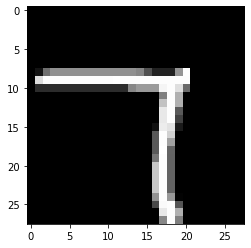

In [88]:
import numpy as np
import keras
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Display
plt.imshow(x_test[141], cmap='gray')
print(y_test[141])

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [23]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [90]:
batch_size = 512
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
106/106 [==============================] - 4s 30ms/step - loss: 0.0184 - accuracy: 0.9936 - val_loss: 0.0289 - val_accuracy: 0.9923
Epoch 2/15
106/106 [==============================] - 3s 26ms/step - loss: 0.0188 - accuracy: 0.9937 - val_loss: 0.0273 - val_accuracy: 0.9927
Epoch 3/15
106/106 [==============================] - 3s 26ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0288 - val_accuracy: 0.9928
Epoch 4/15
106/106 [==============================] - 3s 26ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0277 - val_accuracy: 0.9930
Epoch 5/15
106/106 [==============================] - 3s 27ms/step - loss: 0.0183 - accuracy: 0.9936 - val_loss: 0.0304 - val_accuracy: 0.9927
Epoch 6/15
106/106 [==============================] - 3s 26ms/step - loss: 0.0168 - accuracy: 0.9939 - val_loss: 0.0298 - val_accuracy: 0.9927
Epoch 7/15
106/106 [==============================] - 3s 26ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0288 - val_accuracy: 0.9927

In [91]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.022440923377871513
Test accuracy: 0.9932000041007996


In [92]:
from keras.models import load_model
import matplotlib.pyplot as plt

# Save model
model.save('./CNN_Mnist.h5')
#
# Load Model

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])




Test loss: 0.022440923377871513
Test accuracy: 0.9932000041007996


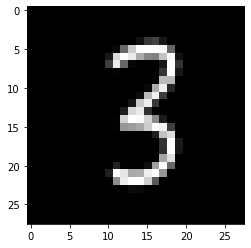

shape: (1, 28, 28, 1)


In [98]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy


# method 1
image = cv2.imread('/content/drive/MyDrive/GoMath/cccc.png',-1)
img1 = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)
sp=img1.shape
width=sp[0]
height=sp[1]
for yh in range(height):
  for xw in range(width):
    color_d=img1[xw,yh]
    if(color_d[3]==0):
      img1[xw,yh]=[255,255,255,255]


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

cover=copy.deepcopy(img1)
rows=cover.shape[0]
cols=cover.shape[1]

for i in range(rows):
    for j in range(cols):
        cover[i][j]=255-cover[i][j]

plt.imshow(cover, cmap='gray')
plt.show()


image = np.array(cover).reshape(1,28,28)/255
#aa = image.astype("float32")
# Make sure images have shape (28, 28, 1)

ans = np.expand_dims(image, -1)
print("shape:", ans.shape)

In [99]:
predict = model.predict(ans)
y_classes = predict.argmax(axis=-1)
print('Prediction:', predict)
print(y_classes)

Prediction: [[4.4997893e-18 1.9327801e-13 2.0275338e-10 1.0000000e+00 6.8013928e-19
  6.0734517e-10 6.2250582e-15 4.0136311e-11 1.4719692e-10 1.2679315e-11]]
[3]


In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [10]:
pwd

'/content'